In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba 
from numba import prange

from Single_Var_QR import SingleQRSampler


In [2]:
from typing import Union

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

# Generate some fake data

In [5]:
np.random.seed(8)

In [6]:
x_vals = np.concatenate([np.arange(-0.99,1, 0.01),
                         np.arange(-0.99,1, 0.01),
                        np.arange(-0.99,1, 0.01)])
y_vals_true = 0 + 1*x_vals + np.random.normal(0,1,len(x_vals))

In [7]:
# Generate surya dataset

x_vals = np.random.uniform(-1,1,400)

def test_beta_0(tau):
    return 3*(tau - 0.5)*(np.log(1/(tau*(1-tau))))

def test_beta_1(tau):
    return 4*((tau-0.5)**2) * (np.log(1/(tau*(1-tau))))

def test_quantile_function(tau, x):
    
    output = 3*(tau - 0.5)*(np.log(1/(tau*(1-tau)))) + 4*((tau-0.5)**2) * (np.log(1/(tau*(1-tau)))) * x
    
    return output

# Sample 1000 random quantiles
tau_rands = np.random.uniform(0,1,400)

y_vals_true = np.array([test_quantile_function(tau, x) for tau, x in zip(tau_rands, x_vals)])


## First Plot: Single sample for multiple tau

In [8]:
# Example X_vals and tau_vals
tau_vals = np.arange(0,1,0.05)[1:]



- Use surya data 2017

In [9]:
tau_test = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
beta_0s = [test_beta_0(t) for t in tau_test]
beta_1s = [test_beta_1(t) for t in tau_test]

Text(0, 0.5, 'Y')

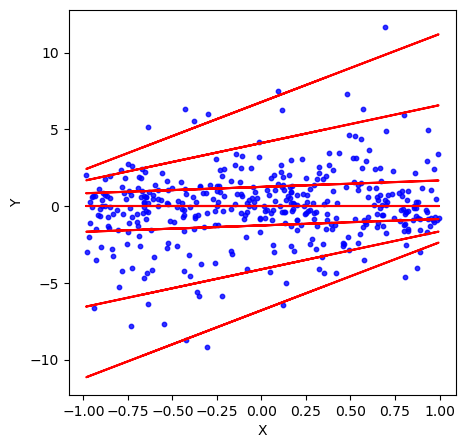

In [10]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(x_vals, y_vals_true, s=10, color='blue', alpha=0.8)
    
    
for b0,b1 in zip(beta_0s, beta_1s):
    
    y_pred_true = b0 + x_vals*b1
    
    ax.plot(x_vals, y_pred_true, c='red')
    
ax.set_xlabel('X')
ax.set_ylabel('Y')

# MCMC Sampling

- Block (Metropolis in Gibbs):
- Block 1: Eta Function components, GP, lambda and rho
- Block 2: Remaining, mu, gamma, sigma1 and sigma2

# MCMC Sampling Loop with Approximation

Setting priors for 
- W $\sim$ GP Thingy (Just draw from multviariate)?
- $\kappa^2 \sim  IG(3,1/3)$
- $\lambda^2 \sim Ga(5,1/10)$
- $\rho \sim Unif(0,1)$
- $\sigma_1, \sigma_2 \sim Ga(2,2)$
- $\mu \sim N(0,1)$
- $\gamma \sim N(0,1)$

Block metropolis with blocks
- W, $\kappa^2$, $\lambda^2$, $\rho$
-  $\sigma_1, \sigma_2, \mu, \gamma$

In [11]:
np.random.seed(111)

n_chains = 2

"""
sampler_collecter = [SingleQRSampler(y_vals_true,
                                    x_vals,          
                                    C_1 = 0.5,
                                    lambda_step_size_1 = 3,
                                    alpha_step_size_1 = 0.8,
                                    a_target_1 = 0.228,
                                    C_2 = 0.5,
                                    lambda_step_size_2 = 3,
                                    alpha_step_size_2 = 0.7,
                                    a_target_2 = 0.228,
                                    tau_grid_expanded = np.arange(-0.01,1.02,0.01),
                                    tau_grid = np.arange(0.01,1.0,0.01),     
                                    knot_points_grid = np.arange(0.1,1,0.1),
                                    am_lamb_block1_init = 2*(2.38**2)/(2*9+1),
                                    am_lamb_block2_init = 2*(2.38**2)/4,
                                    alpha_kappa = 3,
                                    beta_kappa = 1/3,
                                    eps_1 = 0,
                                    eps_2 = 0) for _ in range(n_chains)]
"""

tau_grid_expanded = np.array([round(-0.01 + 0.01 * i,2) for i in range(103)])
tau_grid = np.array([round(0.01 + 0.01 * i,2) for i in range(99)])


# Working 
# sd=1.0, alpha_steps = 0.8

sampler_collecter = [SingleQRSampler(y_vals_true,
                                    x_vals,          
                                    C_1 = 0.5,
                                    lambda_step_size_1 = 3,
                                    alpha_step_size_1 = 0.8,
                                    a_target_1 = 0.228,
                                    C_2 = 0.5,
                                    lambda_step_size_2 = 3,
                                    alpha_step_size_2 = 0.8,
                                    a_target_2 = 0.228,
                                    tau_grid_expanded = tau_grid_expanded,
                                    tau_grid = tau_grid,     
                                    knot_points_grid = np.arange(0.1,1,0.1),
                                    am_lamb_block1_init = (2.38**2)/(2*9+1),
                                    am_lamb_block2_init = (2.38**2)/4,
                                    alpha_kappa = 3,
                                    beta_kappa = 1/3,
                                    eps_1 = 0,
                                    eps_2 = 0,
                                    base_quantile_mean=0.0,
                                    base_quantile_sd=1.0,
                                    base_quantile_v=1,
                                    base_quantile_dist='norm') for _ in range(n_chains)]

chain_outputs = [sampler_c.sample(n_steps=25000) for sampler_c in sampler_collecter]

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Lambda Current:  2.275732992457849
Mu Current:  0
Gamma Current:  0
Sigma 1 Current:  1
Sigma 2 Current:  1
Step:  100  Time Taken:  11.802841901779175 Block 1 Accept:  15.0  Block 2 Accept:  3.0
Step:  200  Time Taken:  2.250685930252075 Block 1 Accept:  10.0  Block 2 Accept:  1.5
Step:  300  Time Taken:  2.1916017532348633 Block 1 Accept:  7.0  Block 2 Accept:  1.0
Step:  400  Time Taken:  2.0886006355285645 Block 1 Accept:  6.25  Block 2 Accept:  0.75
Step:  500  Time Taken:  2.126224994659424 Block 1 Accept:  6.0  Block 2 Accept:  0.6
Step:  600  Time Taken:  2.0750012397766113 Block 1 Accept:  6.333333333333333  Block 2 Accept:  0.5
Step:  700  Time Taken:  2.1140778064727783 Block 1 Accept:  6.142857142857143  Block 2 Accept:  0.7142857142857143
Step:  800  Time Taken:  2.081508159637451 Block 1 Accept:  6.5  Block 2 Accept:  0.625
Step:  900  Time Taken:  2.0832479000091553 Block 1 Accept:  6.666666666666667  Block 2 Accept:  0.5555555555555556
Step:  1000  Time Taken:  2.065243

Step:  6700  Time Taken:  2.088118076324463 Block 1 Accept:  11.044776119402986  Block 2 Accept:  6.268656716417911
Step:  6800  Time Taken:  2.1048226356506348 Block 1 Accept:  11.102941176470589  Block 2 Accept:  6.367647058823529
Step:  6900  Time Taken:  2.0467629432678223 Block 1 Accept:  11.27536231884058  Block 2 Accept:  6.666666666666667
Step:  7000  Time Taken:  2.0891129970550537 Block 1 Accept:  11.457142857142857  Block 2 Accept:  6.757142857142857
Lambda Current:  4.159916943812304
Mu Current:  0.08194673649613654
Gamma Current:  1.5974457343542092
Sigma 1 Current:  3.1561701676588827
Sigma 2 Current:  4.450269745355161
Step:  7100  Time Taken:  2.058964967727661 Block 1 Accept:  11.535211267605634  Block 2 Accept:  6.887323943661972
Step:  7200  Time Taken:  2.0998599529266357 Block 1 Accept:  11.583333333333334  Block 2 Accept:  6.986111111111111
Step:  7300  Time Taken:  2.090933084487915 Block 1 Accept:  11.63013698630137  Block 2 Accept:  7.082191780821918
Step:  740

Step:  13000  Time Taken:  2.074742078781128 Block 1 Accept:  14.161538461538461  Block 2 Accept:  10.8
Lambda Current:  4.083327088066899
Mu Current:  0.568350089050036
Gamma Current:  1.628531275988095
Sigma 1 Current:  2.717784770029136
Sigma 2 Current:  4.782493650057912
Step:  13100  Time Taken:  2.132209300994873 Block 1 Accept:  14.13740458015267  Block 2 Accept:  10.854961832061068
Step:  13200  Time Taken:  2.305635929107666 Block 1 Accept:  14.136363636363637  Block 2 Accept:  10.901515151515152
Step:  13300  Time Taken:  2.3098108768463135 Block 1 Accept:  14.082706766917294  Block 2 Accept:  10.909774436090226
Step:  13400  Time Taken:  2.054274082183838 Block 1 Accept:  14.022388059701493  Block 2 Accept:  10.917910447761194
Step:  13500  Time Taken:  2.1034739017486572 Block 1 Accept:  13.992592592592592  Block 2 Accept:  10.91851851851852
Step:  13600  Time Taken:  2.1617910861968994 Block 1 Accept:  13.977941176470589  Block 2 Accept:  10.955882352941176
Step:  13700  T

Step:  19100  Time Taken:  2.065603733062744 Block 1 Accept:  13.12565445026178  Block 2 Accept:  10.942408376963352
Step:  19200  Time Taken:  2.0354580879211426 Block 1 Accept:  13.078125  Block 2 Accept:  10.96875
Step:  19300  Time Taken:  2.0712640285491943 Block 1 Accept:  13.05699481865285  Block 2 Accept:  10.937823834196891
Step:  19400  Time Taken:  2.08428692817688 Block 1 Accept:  13.04639175257732  Block 2 Accept:  10.95360824742268
Step:  19500  Time Taken:  2.0235350131988525 Block 1 Accept:  12.984615384615385  Block 2 Accept:  10.928205128205128
Step:  19600  Time Taken:  1.989666223526001 Block 1 Accept:  12.959183673469388  Block 2 Accept:  10.903061224489797
Step:  19700  Time Taken:  2.093475103378296 Block 1 Accept:  12.964467005076141  Block 2 Accept:  10.939086294416244
Step:  19800  Time Taken:  2.091902017593384 Block 1 Accept:  12.98989898989899  Block 2 Accept:  10.94949494949495
Step:  19900  Time Taken:  2.03143310546875 Block 1 Accept:  12.949748743718592

Step:  400  Time Taken:  2.0552659034729004 Block 1 Accept:  11.0  Block 2 Accept:  1.5
Step:  500  Time Taken:  2.0692708492279053 Block 1 Accept:  10.6  Block 2 Accept:  1.2
Step:  600  Time Taken:  2.0831427574157715 Block 1 Accept:  10.5  Block 2 Accept:  1.0
Step:  700  Time Taken:  2.431735038757324 Block 1 Accept:  10.142857142857142  Block 2 Accept:  0.8571428571428571
Step:  800  Time Taken:  2.0415732860565186 Block 1 Accept:  10.625  Block 2 Accept:  0.875
Step:  900  Time Taken:  2.049199104309082 Block 1 Accept:  10.88888888888889  Block 2 Accept:  0.7777777777777778
Step:  1000  Time Taken:  2.1707561016082764 Block 1 Accept:  11.2  Block 2 Accept:  0.7
Lambda Current:  4.764281848306611
Mu Current:  0.6073003527783537
Gamma Current:  5.684149951997061
Sigma 1 Current:  3.476247795359992
Sigma 2 Current:  4.708048578659588
Step:  1100  Time Taken:  2.0562212467193604 Block 1 Accept:  10.909090909090908  Block 2 Accept:  0.6363636363636364
Step:  1200  Time Taken:  2.06490

Step:  7000  Time Taken:  2.056305170059204 Block 1 Accept:  11.871428571428572  Block 2 Accept:  4.071428571428571
Lambda Current:  4.669974987613756
Mu Current:  1.482071408017111
Gamma Current:  5.269012074582121
Sigma 1 Current:  3.214292641202499
Sigma 2 Current:  3.9537383026624062
Step:  7100  Time Taken:  1.99729585647583 Block 1 Accept:  11.704225352112676  Block 2 Accept:  4.014084507042254
Step:  7200  Time Taken:  2.374661922454834 Block 1 Accept:  11.666666666666666  Block 2 Accept:  4.027777777777778
Step:  7300  Time Taken:  2.140207052230835 Block 1 Accept:  11.726027397260275  Block 2 Accept:  4.123287671232877
Step:  7400  Time Taken:  2.3409228324890137 Block 1 Accept:  11.743243243243244  Block 2 Accept:  4.175675675675675
Step:  7500  Time Taken:  2.269109010696411 Block 1 Accept:  11.76  Block 2 Accept:  4.24
Step:  7600  Time Taken:  2.209117889404297 Block 1 Accept:  11.710526315789474  Block 2 Accept:  4.2368421052631575
Step:  7700  Time Taken:  2.040169000625

Step:  13200  Time Taken:  2.0608041286468506 Block 1 Accept:  11.719696969696969  Block 2 Accept:  6.2727272727272725
Step:  13300  Time Taken:  2.0799131393432617 Block 1 Accept:  11.729323308270677  Block 2 Accept:  6.285714285714286
Step:  13400  Time Taken:  2.076519250869751 Block 1 Accept:  11.783582089552239  Block 2 Accept:  6.343283582089552
Step:  13500  Time Taken:  2.04171085357666 Block 1 Accept:  11.829629629629629  Block 2 Accept:  6.42962962962963
Step:  13600  Time Taken:  2.081369161605835 Block 1 Accept:  11.830882352941176  Block 2 Accept:  6.470588235294118
Step:  13700  Time Taken:  2.102841854095459 Block 1 Accept:  11.788321167883211  Block 2 Accept:  6.510948905109489
Step:  13800  Time Taken:  2.0746819972991943 Block 1 Accept:  11.746376811594203  Block 2 Accept:  6.5144927536231885
Step:  13900  Time Taken:  2.0768587589263916 Block 1 Accept:  11.726618705035971  Block 2 Accept:  6.546762589928058
Step:  14000  Time Taken:  2.084770917892456 Block 1 Accept:

Step:  19400  Time Taken:  2.2374768257141113 Block 1 Accept:  10.850515463917526  Block 2 Accept:  6.876288659793815
Step:  19500  Time Taken:  2.136245012283325 Block 1 Accept:  10.815384615384616  Block 2 Accept:  6.866666666666666
Step:  19600  Time Taken:  2.0733299255371094 Block 1 Accept:  10.775510204081632  Block 2 Accept:  6.857142857142857
Step:  19700  Time Taken:  2.039726734161377 Block 1 Accept:  10.725888324873097  Block 2 Accept:  6.822335025380711
Step:  19800  Time Taken:  2.088304042816162 Block 1 Accept:  10.676767676767676  Block 2 Accept:  6.813131313131313
Step:  19900  Time Taken:  2.0953919887542725 Block 1 Accept:  10.628140703517587  Block 2 Accept:  6.834170854271357
Step:  20000  Time Taken:  2.086246967315674 Block 1 Accept:  10.6  Block 2 Accept:  6.835
Lambda Current:  6.513914253586439
Mu Current:  0.8601613978157233
Gamma Current:  5.3806126102185665
Sigma 1 Current:  2.9751598397899235
Sigma 2 Current:  3.1737431954722517
Step:  20100  Time Taken:  2

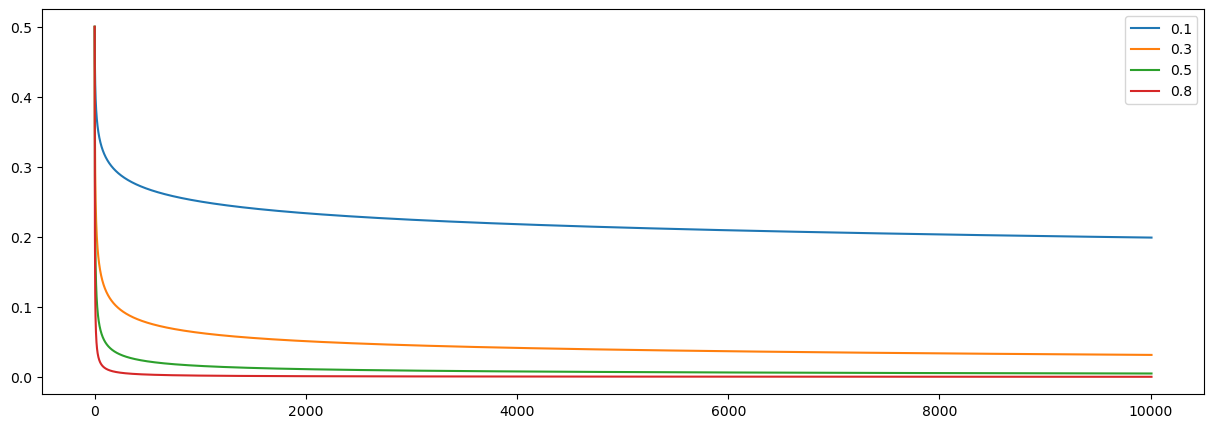

In [12]:
fig, ax = plt.subplots(figsize=(15,5))

C_c = 0.5
alpha_c = 0.1
n_steps = 10000

for C in [0.5]:
    for alph in [0.1,0.3,0.5,0.8]:

        check_sizes =  C/(np.arange(1,n_steps+10)**alph)
        ax.plot(check_sizes, label=str(alph))
        
ax.legend()

# Chain Eval

## Kappa and Lambda

In [13]:
color_scheme = ['tab:blue','tab:red', 'tab:green','tab:orange']

Text(0.5, 1.0, 'Lambda Trace Plot')

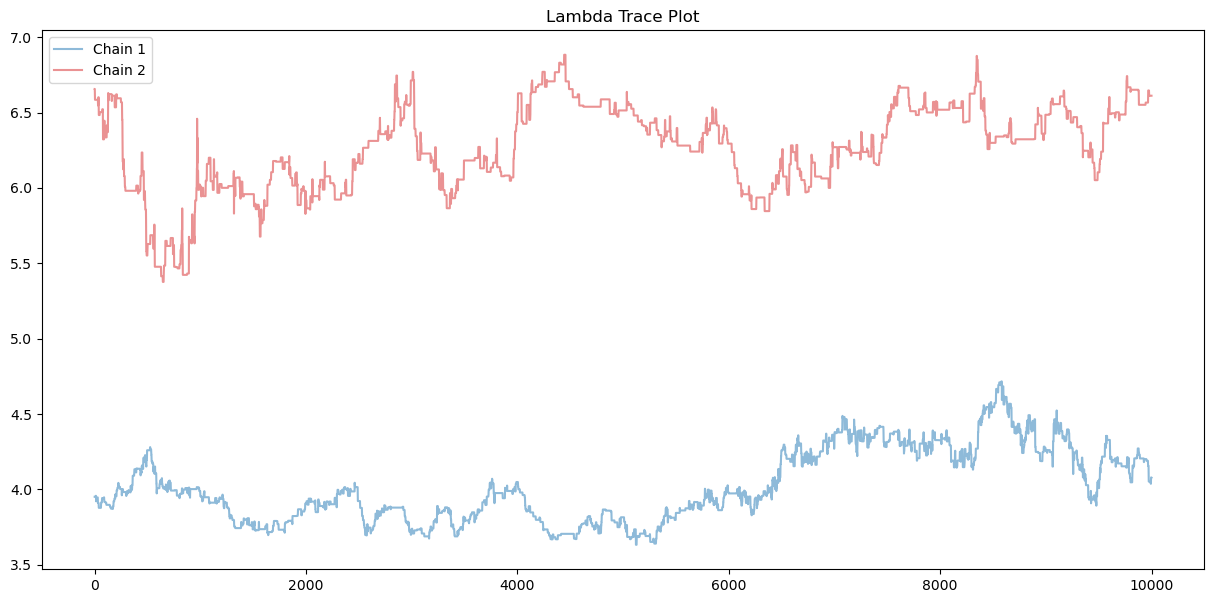

In [14]:
fig, ax = plt.subplots(figsize=(15,7))

n_burn_in = 15000


for i in range(n_chains):

    ax.plot(chain_outputs[i]['lambda'][n_burn_in:], alpha=0.5, c=color_scheme[i], label=f'Chain {i+1}')

ax.legend()
ax.set_title('Lambda Trace Plot')





## Mu Gamma Sigmas

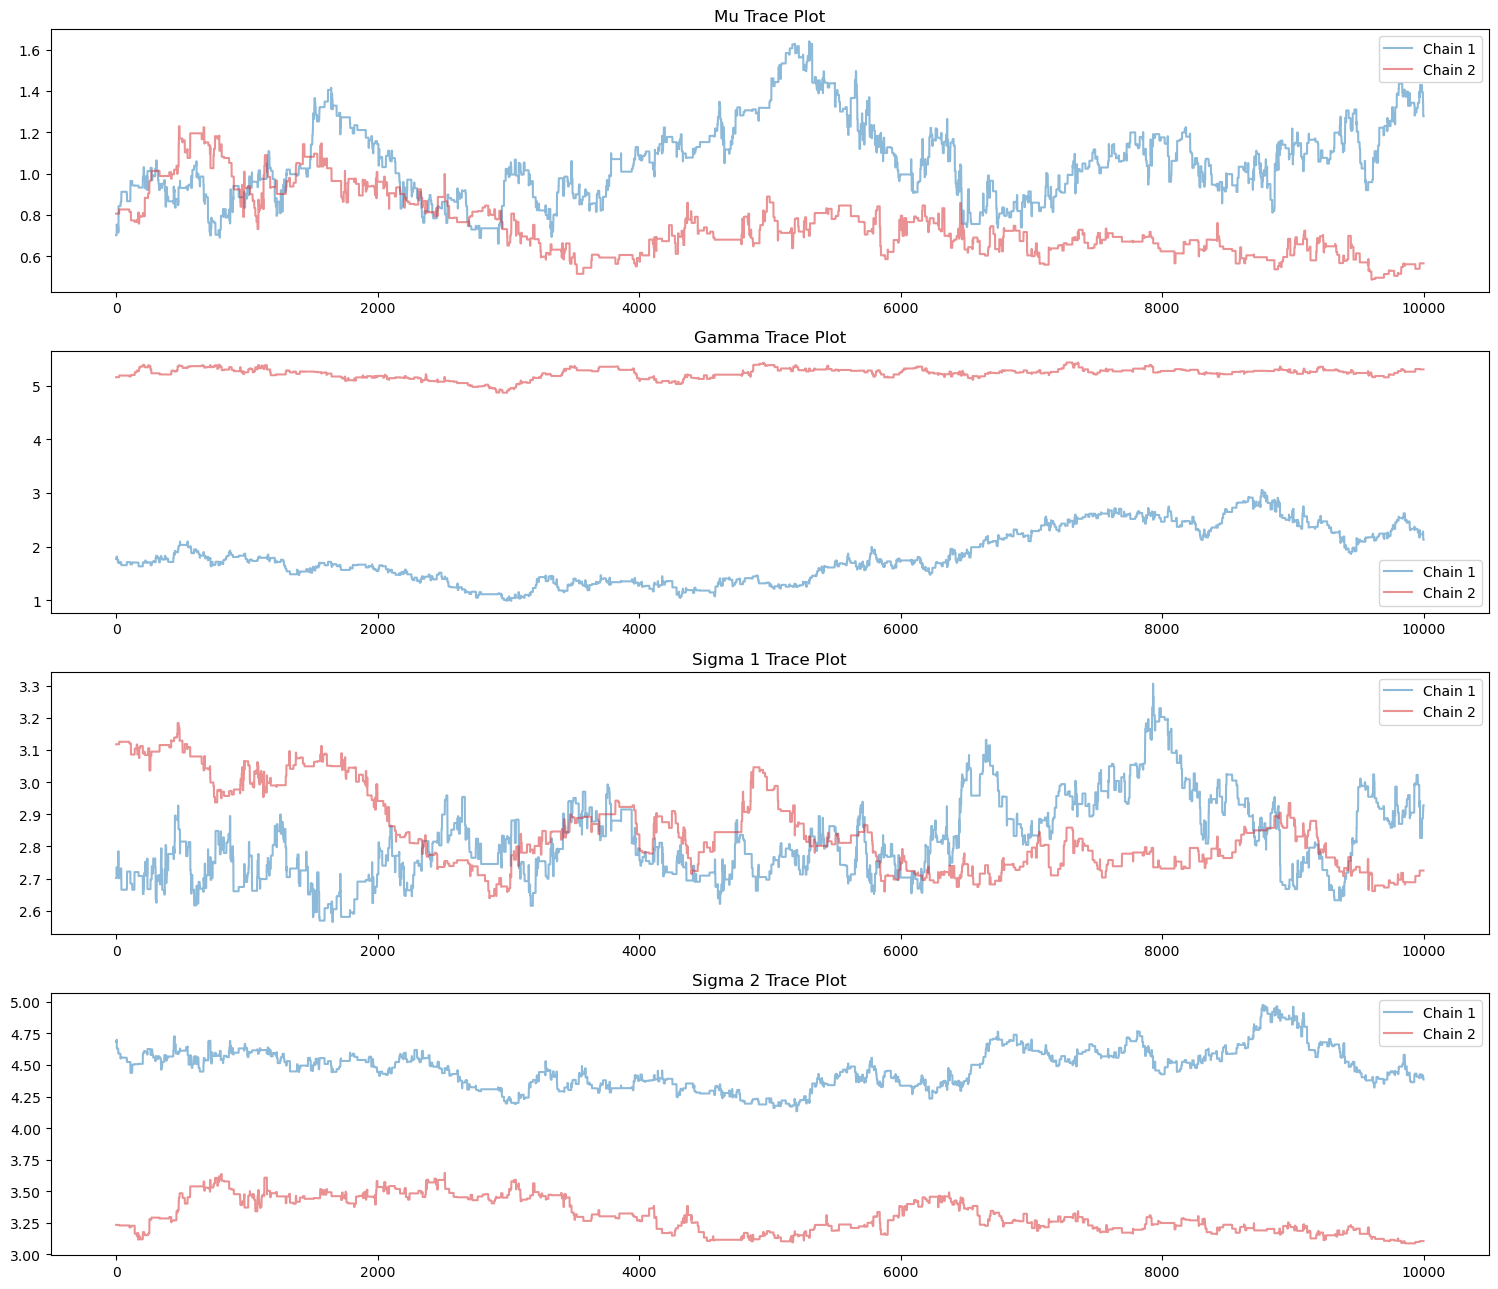

In [15]:
fig, ax = plt.subplots(4,1,figsize=(15,13))


for i in range(n_chains):
    ax[0].plot(chain_outputs[i]['mu'][n_burn_in:], alpha=0.5, c=color_scheme[i], label=f'Chain {i+1}')
    ax[1].plot(chain_outputs[i]['gamma'][n_burn_in:], alpha=0.5, c=color_scheme[i], label=f'Chain {i+1}')
    ax[2].plot(chain_outputs[i]['sigma_1'][n_burn_in:], alpha=0.5, c=color_scheme[i], label=f'Chain {i+1}')
    ax[3].plot(chain_outputs[i]['sigma_2'][n_burn_in:], alpha=0.5, c=color_scheme[i], label=f'Chain {i+1}')

ax[0].set_title('Mu Trace Plot')
ax[1].set_title('Gamma Trace Plot')
ax[2].set_title('Sigma 1 Trace Plot')
ax[3].set_title('Sigma 2 Trace Plot')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

plt.tight_layout()

## Checking Correlation Between Parameters

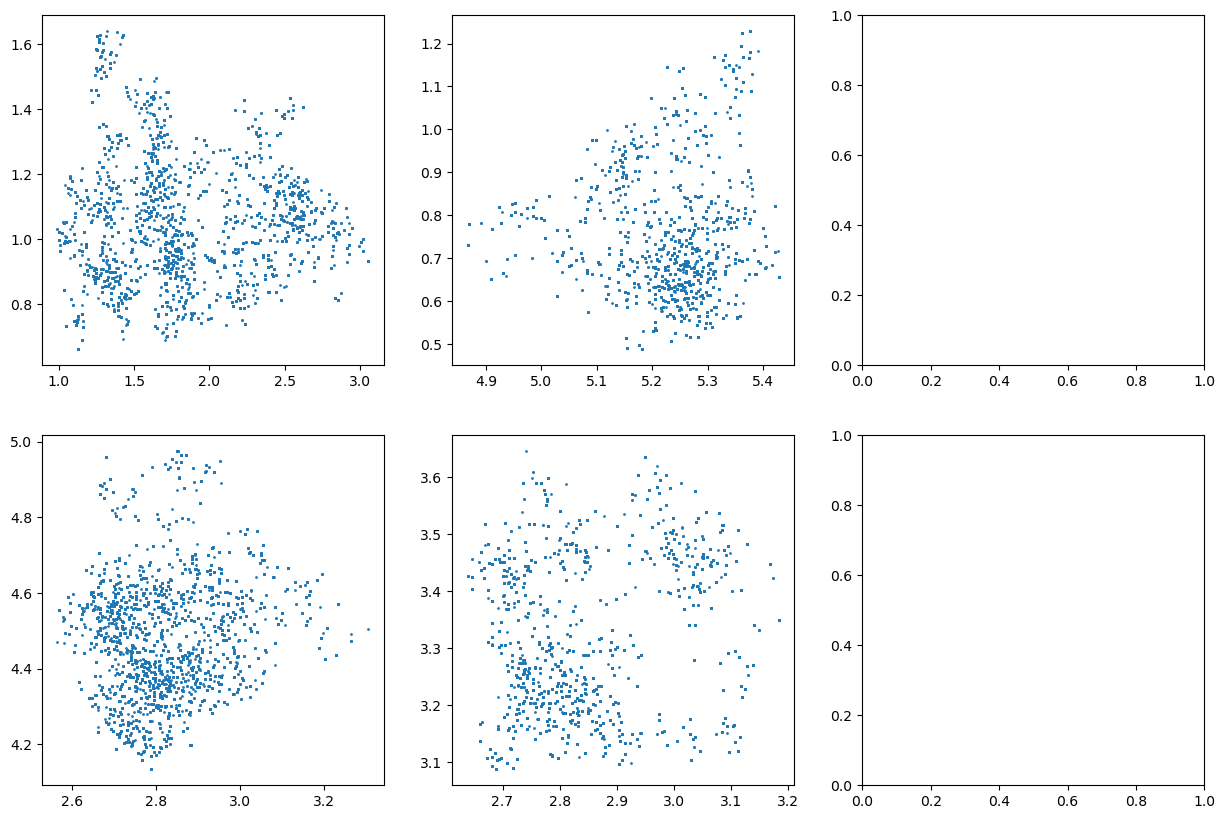

In [16]:
fig, ax = plt.subplots(2,3, figsize=(15,10))

# mu gamma
for i in range(n_chains):
    
    gamma_samps = chain_outputs[i]['gamma'][n_burn_in:]
    mu_samps = chain_outputs[i]['mu'][n_burn_in:]
    
    ax[0,i].scatter(gamma_samps, mu_samps, s=1)
    

# mu gamma
for i in range(n_chains):
    
    sigma_1_samps = chain_outputs[i]['sigma_1'][n_burn_in:]
    sigma_2_samps = chain_outputs[i]['sigma_2'][n_burn_in:]
    
    ax[1,i].scatter(sigma_1_samps, sigma_2_samps, s=1)
    

## Inferred Beta 0 Beta 1 at various tau levels

In [17]:
from typing import List
from Single_Var_QR_utils import *


In [18]:
def generate_beta_samples(tau_input: float,
                          tau_grid: np.ndarray,
                          w_approx_store: List[np.ndarray],
                          mu_store: List[float],
                          gamma_store: List[float],
                          sigma_1_store: List[float],
                          sigma_2_store: List[float]):

    beta_0_store = []
    beta_1_store = []
    for i in range(0,len(w_approx_store)):
        w_samp = w_approx_store[i]
        w1_samp = w_samp[0:103]
        w2_samp = w_samp[103:]

        mu_samp = mu_store[i]
        gamma_samp = gamma_store[i]
        sigma_1_samp = sigma_1_store[i]
        sigma_2_samp = sigma_2_store[i]


        eta_1_samp = eta_function_i_vector(tau_input=np.array([tau_input]),
                                             w_vals=w1_samp,
                                             tau_grid=tau_grid,
                                             mean=0.0,
                                             sd=1.0,
                                             v=1,
                                             sigma=sigma_1_samp,
                                             dist='norm')[0]


        eta_2_samp = eta_function_i_vector(tau_input=np.array([tau_input]),
                                             w_vals=w2_samp,
                                             tau_grid=tau_grid,
                                             mean=0.0,
                                             sd=1.0,
                                             v=1,
                                             sigma=sigma_2_samp,
                                             dist='norm')[0]


        beta_0_samp = mu_samp + (eta_1_samp + eta_2_samp)/2
        beta_1_samp = gamma_samp + (eta_2_samp - eta_1_samp)/2

        beta_0_store.append(beta_0_samp)
        beta_1_store.append(beta_1_samp)
        
    return beta_0_store, beta_1_store

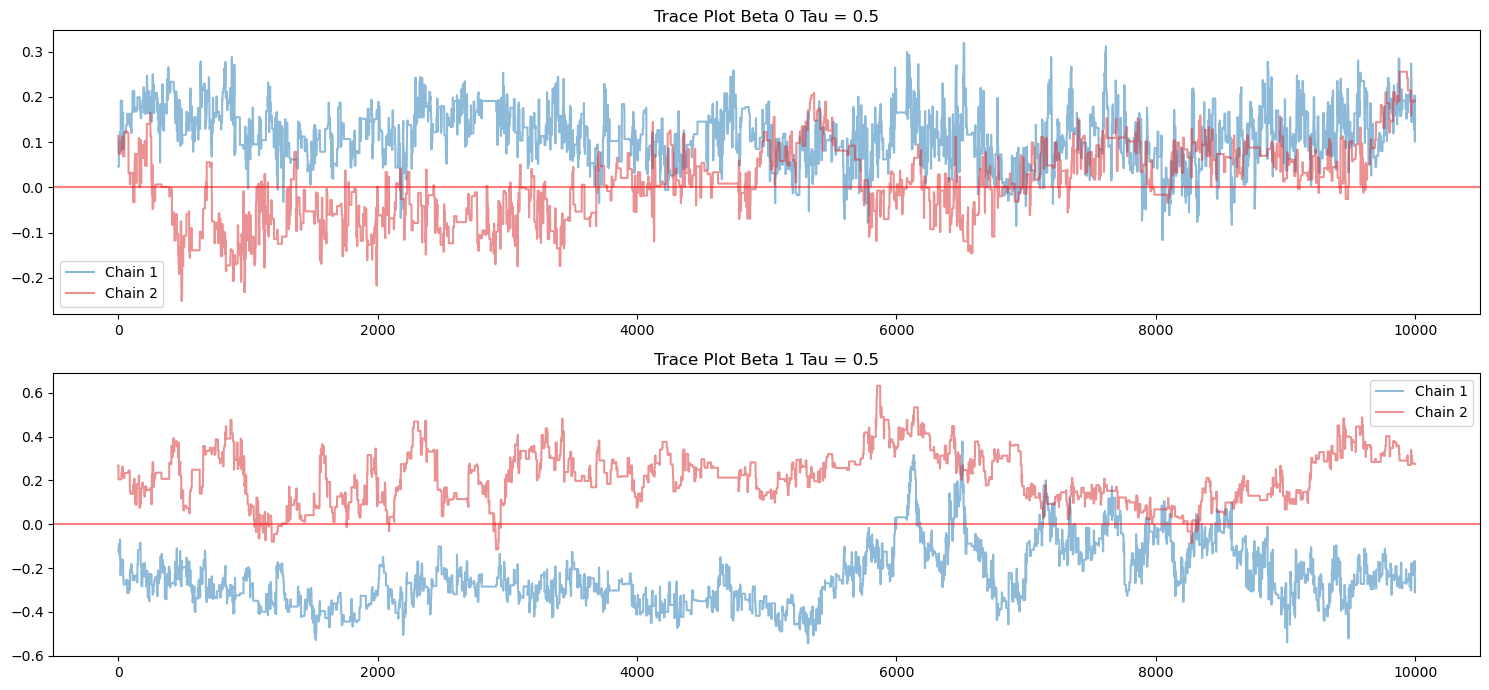

In [19]:
fig,ax = plt.subplots(2,1, figsize=(15,7))

input_tau = 0.5

tau_grid_expanded = np.arange(-0.01,1.02,0.01)

for i in range(n_chains):
    beta_0_samps, beta_1_samps = generate_beta_samples(tau_input=input_tau,
                                                      tau_grid=tau_grid_expanded,
                                                      w_approx_store=chain_outputs[i]['w'],
                                                      mu_store=chain_outputs[i]['mu'],
                                                      gamma_store=chain_outputs[i]['gamma'],
                                                      sigma_1_store=chain_outputs[i]['sigma_1'],
                                                      sigma_2_store=chain_outputs[i]['sigma_2'])

    
    ax[0].plot(beta_0_samps[n_burn_in:], alpha=0.5, c=color_scheme[i], label=f'Chain {i+1}')
    ax[1].plot(beta_1_samps[n_burn_in:], alpha=0.5, c=color_scheme[i], label=f'Chain {i+1}')
    
ax[0].axhline(test_beta_0(input_tau),c='red', alpha=0.5)
ax[1].axhline(test_beta_1(input_tau),c='red', alpha=0.5)

ax[0].legend()
ax[1].legend()

ax[0].set_title('Trace Plot Beta 0 Tau = '+str(input_tau))
ax[1].set_title('Trace Plot Beta 1 Tau = '+str(input_tau))
plt.tight_layout()

Plot Example lines

In [20]:
y_pred_samples = np.array([b0 + b1*x_vals for b0,b1 in zip(beta_0_samps, beta_1_samps)])
y_pred_samples = y_pred_samples[n_burn_in:]

In [21]:
log_scores = [np.mean(s.log_score[n_burn_in:]) for s in sampler_collecter]

In [22]:
tau_grid_expanded = np.array([round(-0.01 + 0.01 * i,2) for i in range(103)])
tau_grid = np.array([round(0.01 + 0.01 * i,2) for i in range(99)])


Text(0.5, 0.98, 'Posterior Estimates for Various Quantile Levels')

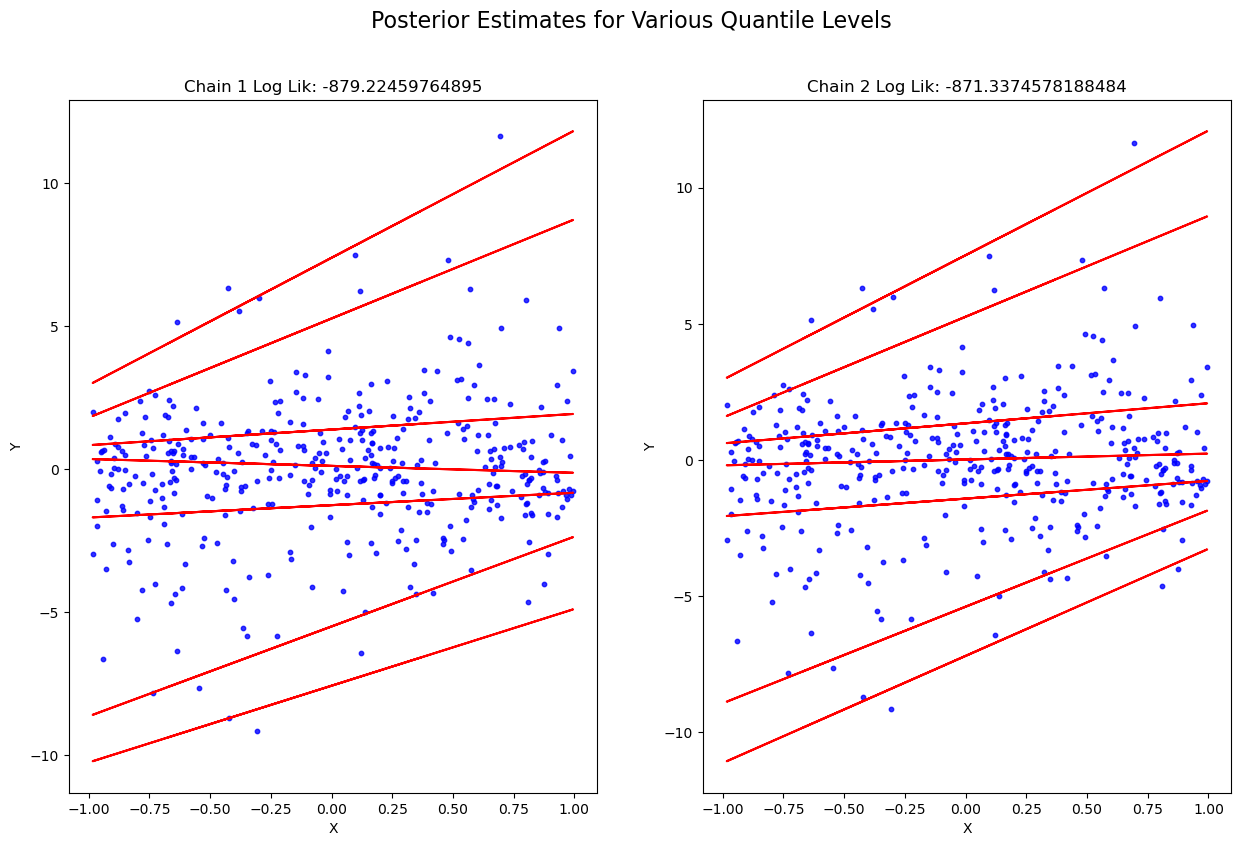

In [23]:
fig, ax = plt.subplots(1,2,figsize=(15,9))

for i in range(n_chains):
    ax[i].scatter(x_vals, y_vals_true, s=10, color='blue', alpha=0.8)

#sample_quantiles = [0.05, 0.25, 0.5, 0.75, 0.95]
sample_quantiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
#sample_quantiles = [0.5]

for sq in sample_quantiles:
    
    for i in range(n_chains):
        beta_0_samps, beta_1_samps = generate_beta_samples(tau_input=sq,
                                                      tau_grid=tau_grid_expanded,
                                                      w_approx_store=chain_outputs[i]['w'],
                                                      mu_store=chain_outputs[i]['mu'],
                                                      gamma_store=chain_outputs[i]['gamma'],
                                                      sigma_1_store=chain_outputs[i]['sigma_1'],
                                                      sigma_2_store=chain_outputs[i]['sigma_2'])

        y_pred_samples = np.array([b0 + b1*x_vals for b0,b1 in zip(beta_0_samps, beta_1_samps)])
        y_pred_samples = y_pred_samples[n_burn_in:]
        
        ax[i].plot(x_vals, y_pred_samples.mean(0), color='red')

for i in range(n_chains):    
    ax[i].title.set_text(f'Chain {i+1}'+' Log Lik: ' + str(log_scores[i]))
        
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')

#ax[0].set_ylim([-4,4])
#ax[1].set_ylim([-4,4])

ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')


fig.suptitle('Posterior Estimates for Various Quantile Levels', fontsize=16)

In [24]:
import arviz as az

## Plot Posterior GPs

/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_68997/342230484.py:72: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  w_approx_1_cis = az.hdi(w_approx_store_plot[:,0:103])
/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_68997/342230484.py:75: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  w_approx_2_cis = az.hdi(w_approx_store_plot[:,103:])
/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_68997/342230484.py:79: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  eta_1_cis = az.hdi(eta_1_collect)
/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_68997/342230484.py:82: FutureWarning: hdi currently interprets 2d data as 

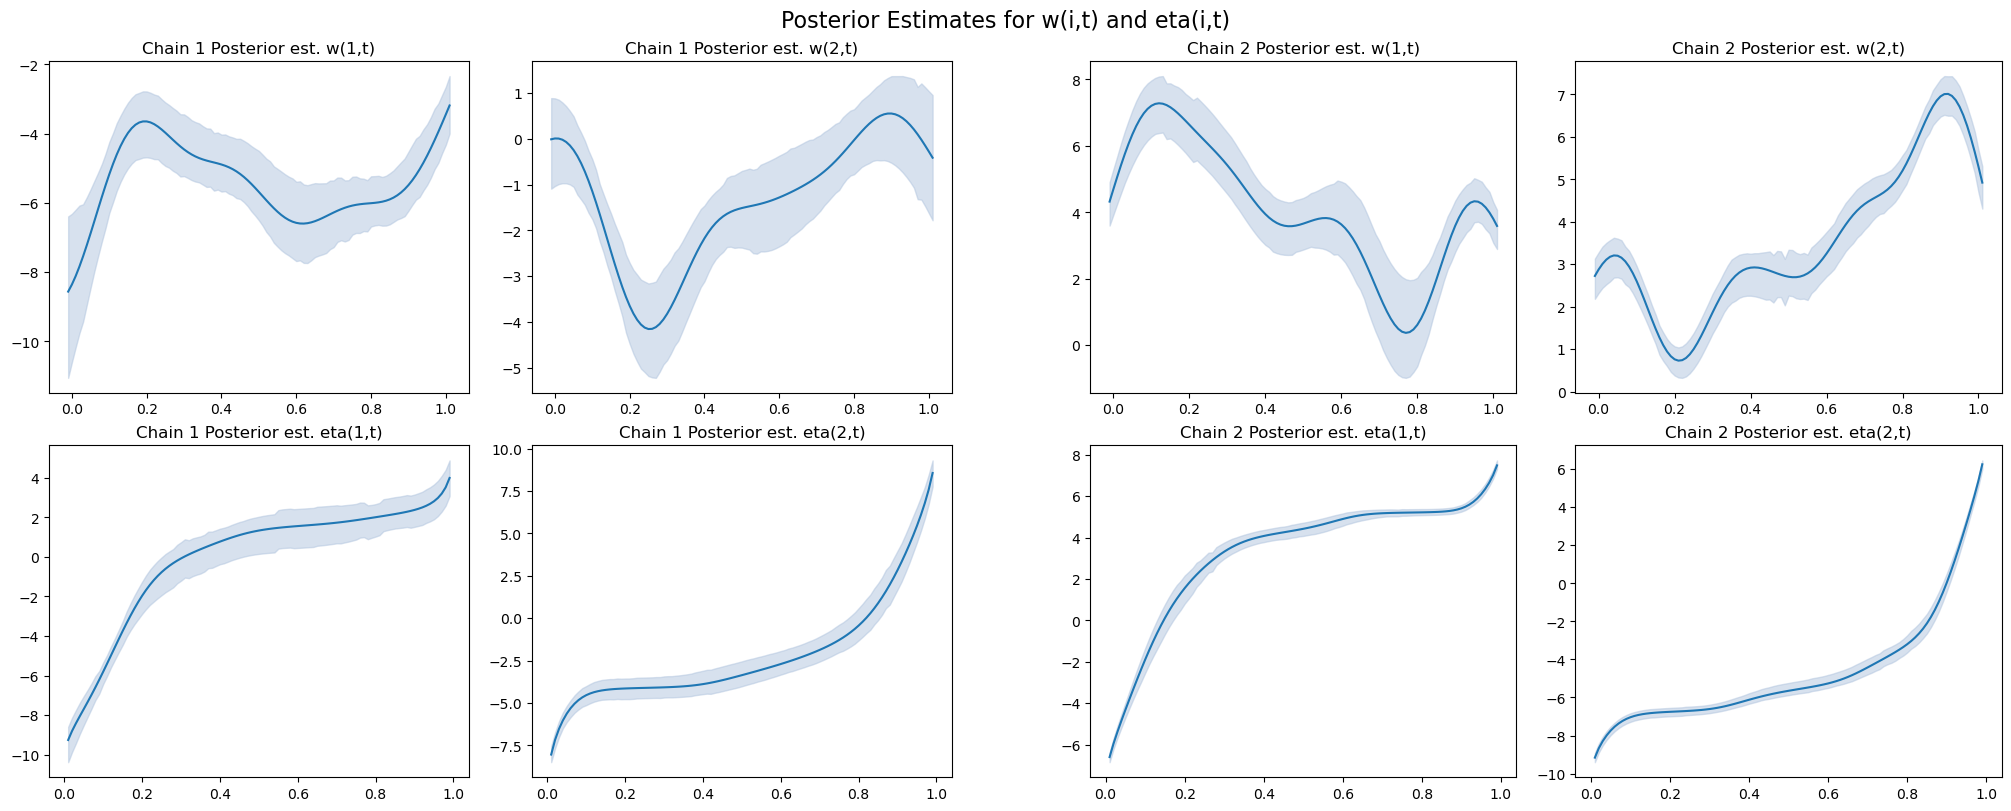

In [25]:
fig = plt.figure(layout='constrained', figsize=(20, 8))
subfigs = fig.subfigures(1, 2, wspace=0.1)

# Define left and right subfigure for chain 1 and 2
ax_left = subfigs[0].subplots(2,2)
ax_right = subfigs[1].subplots(2,2)

n_burn_in = 20000

tau_grid_expanded = np.array([round(-0.01 + 0.01 * i,2) for i in range(103)])
tau_grid = np.array([round(0.01 + 0.01 * i,2) for i in range(99)])


# Iterate over chains
for c in range(n_chains):
    
    mu_store=chain_outputs[c]['mu']
    gamma_store=chain_outputs[c]['gamma']
    sigma_1_store=chain_outputs[c]['sigma_1']
    sigma_2_store=chain_outputs[c]['sigma_2']
    
    w_approx_store = chain_outputs[c]['w']
    w_approx_store_plot = np.vstack(w_approx_store)[n_burn_in:,:]
    
    eta_1_collect = []
    eta_2_collect = []
    
    # Pass each function through the integrator to get xi
    for i in range(w_approx_store_plot.shape[0]):
        w_samp = w_approx_store_plot[i,:]
        w1_samp = w_samp[0:103]
        w2_samp = w_samp[103:]

        mu_samp = mu_store[i+n_burn_in]
        gamma_samp = gamma_store[i+n_burn_in]
        sigma_1_samp = sigma_1_store[i+n_burn_in]
        sigma_2_samp = sigma_2_store[i+n_burn_in]
        
        
        # Get eta 1 and eta 2
        eta_1_samp = eta_function_i_vector(tau_input=tau_grid,
                                             w_vals=w1_samp,
                                             tau_grid=tau_grid_expanded,
                                             mean=0.0,
                                             sd=1.0,
                                             v=1,
                                             sigma=sigma_1_samp,
                                             dist='norm')


        eta_2_samp = eta_function_i_vector(tau_input=tau_grid,
                                             w_vals=w2_samp,
                                             tau_grid=tau_grid_expanded,
                                             mean=0.0,
                                             sd=1.0,
                                             v=1,
                                             sigma=sigma_2_samp,
                                             dist='norm')
        
        # Get resulting beta_0 and beta_1 samples
        beta_0_samp = mu_samp + (eta_1_samp + eta_2_samp)/2
        beta_1_samp = gamma_samp + (eta_2_samp - eta_1_samp)/2
        
        eta_1_collect.append(eta_1_samp)
        eta_2_collect.append(eta_2_samp)
        
    eta_1_collect = np.array(eta_1_collect)
    eta_2_collect = np.array(eta_2_collect)
        
    # Get w means and CIs
    w_approx_1_mean = w_approx_store_plot[:,0:103].mean(0)
    w_approx_1_cis = az.hdi(w_approx_store_plot[:,0:103])
    
    w_approx_2_mean = w_approx_store_plot[:,103:].mean(0)
    w_approx_2_cis = az.hdi(w_approx_store_plot[:,103:])
    
    # Get eta mean and CIs
    eta_1_mean = eta_1_collect.mean(0)
    eta_1_cis = az.hdi(eta_1_collect)
    
    eta_2_mean = eta_2_collect.mean(0)
    eta_2_cis = az.hdi(eta_2_collect)
    
    
    if c == 0:
        ax_left[0,0].plot(tau_grid_expanded, w_approx_1_mean, color='tab:blue')
        ax_left[0,0].fill_between(tau_grid_expanded, w_approx_1_cis[:,0],
                        w_approx_1_cis[:,1], color='lightsteelblue', alpha=.5)
        
        ax_left[0,1].plot(tau_grid_expanded, w_approx_2_mean, color='tab:blue')
        ax_left[0,1].fill_between(tau_grid_expanded, w_approx_2_cis[:,0],
                        w_approx_2_cis[:,1], color='lightsteelblue', alpha=.5)
        
        ax_left[0,0].title.set_text(f"Chain {c+1} Posterior est. w(1,t)")
        ax_left[0,1].title.set_text(f"Chain {c+1} Posterior est. w(2,t)")
        
        #ax_left[0,0].plot(tau_grid_expanded, w_approx_store_plot[:,0:103].T, c='tab:blue', alpha=0.1)
        #ax_left[0,1].plot(tau_grid_expanded, w_approx_store_plot[:,103:].T, c='tab:blue', alpha=0.1)
        
        #ax_left[1,0].plot(tau_grid, eta_1_collect.T, c='tab:blue', alpha=0.1)
        #ax_left[1,1].plot(tau_grid, eta_2_collect.T, c='tab:blue', alpha=0.1)
        
        ax_left[1,0].plot(tau_grid, eta_1_mean, color='tab:blue')
        ax_left[1,0].fill_between(tau_grid, eta_1_cis[:,0],
                        eta_1_cis[:,1], color='lightsteelblue', alpha=.5)
        
        ax_left[1,1].plot(tau_grid, eta_2_mean, color='tab:blue')
        ax_left[1,1].fill_between(tau_grid, eta_2_cis[:,0],
                        eta_2_cis[:,1], color='lightsteelblue', alpha=.5)
        
        ax_left[1,0].title.set_text(f"Chain {c+1} Posterior est. eta(1,t)")
        ax_left[1,1].title.set_text(f"Chain {c+1} Posterior est. eta(2,t)")
        
    
    else:
        ax_right[0,0].plot(tau_grid_expanded, w_approx_1_mean, color='tab:blue')
        ax_right[0,0].fill_between(tau_grid_expanded, w_approx_1_cis[:,0],
                        w_approx_1_cis[:,1], color='lightsteelblue', alpha=.5)
        
        ax_right[0,1].plot(tau_grid_expanded, w_approx_2_mean, color='tab:blue')
        ax_right[0,1].fill_between(tau_grid_expanded, w_approx_2_cis[:,0],
                        w_approx_2_cis[:,1], color='lightsteelblue', alpha=.5)
        
        ax_right[0,0].title.set_text(f"Chain {c+1} Posterior est. w(1,t)")
        ax_right[0,1].title.set_text(f"Chain {c+1} Posterior est. w(2,t)")
        
        #ax_right[0,0].plot(tau_grid_expanded, w_approx_store_plot[:,0:103].T, c='tab:blue', alpha=0.1)
        #ax_right[0,1].plot(tau_grid_expanded, w_approx_store_plot[:,103:].T, c='tab:blue', alpha=0.1)
        
        ax_right[1,0].plot(tau_grid, eta_1_mean, color='tab:blue')
        ax_right[1,0].fill_between(tau_grid, eta_1_cis[:,0],
                        eta_1_cis[:,1], color='lightsteelblue', alpha=.5)
        
        ax_right[1,1].plot(tau_grid, eta_2_mean, color='tab:blue')
        ax_right[1,1].fill_between(tau_grid, eta_2_cis[:,0],
                        eta_2_cis[:,1], color='lightsteelblue', alpha=.5)
        
        ax_right[1,0].title.set_text(f"Chain {c+1} Posterior est. eta(1,t)")
        ax_right[1,1].title.set_text(f"Chain {c+1} Posterior est. eta(2,t)")
        
        
fig.suptitle('Posterior Estimates for w(i,t) and eta(i,t)', fontsize=16)
plt.show()



## Plot Posterior Betas

In [26]:
tau_grid = np.array([round(0.01 + 0.01 * i,2) for i in range(99)])

chain_store = []
for i in range(n_chains):
    b0_val_samples = []
    b1_val_samples = []
    for sq in tau_grid:
        beta_0_samps, beta_1_samps = generate_beta_samples(tau_input=sq,
                                                      tau_grid=tau_grid_expanded,
                                                      w_approx_store=chain_outputs[i]['w'],
                                                      mu_store=chain_outputs[i]['mu'],
                                                      gamma_store=chain_outputs[i]['gamma'],
                                                      sigma_1_store=chain_outputs[i]['sigma_1'],
                                                      sigma_2_store=chain_outputs[i]['sigma_2'])
    
        b0_val_samples.append(beta_0_samps)
        b1_val_samples.append(beta_1_samps)
    
    b0_val_samples = np.array(b0_val_samples)
    b1_val_samples = np.array(b1_val_samples)
    
    chain_store.append([b0_val_samples, b1_val_samples])

/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_68997/345786256.py:13: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  b0_cis = az.hdi(b0_samples.T[n_burn_in:])
/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_68997/345786256.py:16: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  b1_cis = az.hdi(b1_samples.T[n_burn_in:])


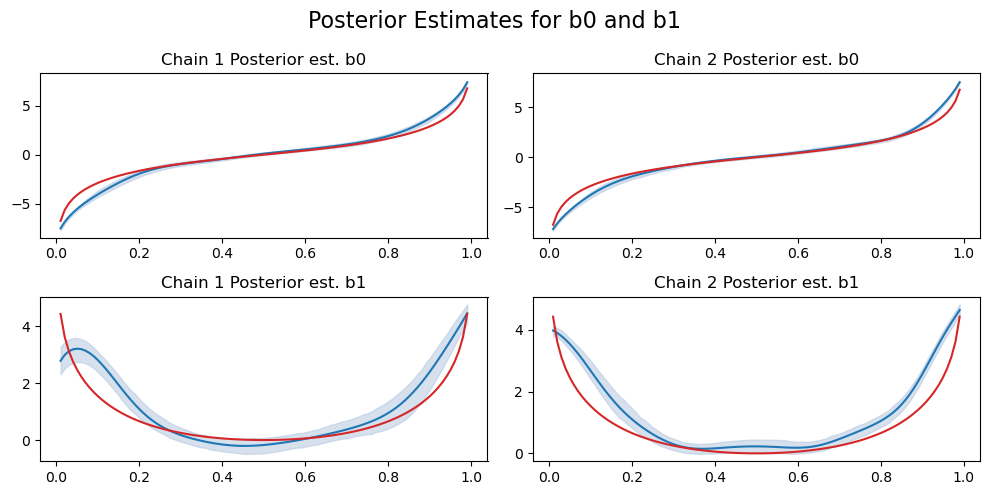

In [27]:
fig, ax = plt.subplots(2,2,figsize=(10,5))

# Get true values
beta_0_true = test_beta_0(tau_grid)
beta_1_true = test_beta_1(tau_grid)

for c in range(n_chains):

    b0_samples, b1_samples = chain_store[c]
    
    # Get b0 b1 means and CIs
    b0_mean = b0_samples.T[n_burn_in:].mean(0)
    b0_cis = az.hdi(b0_samples.T[n_burn_in:])
    
    b1_mean = b1_samples.T[n_burn_in:].mean(0)
    b1_cis = az.hdi(b1_samples.T[n_burn_in:])
    
    
    # Plot values
    ax[0,c].plot(tau_grid, b0_mean, color='tab:blue')
    ax[0,c].fill_between(tau_grid, b0_cis[:,0],
                    b0_cis[:,1], color='lightsteelblue', alpha=.5)
    
    ax[1,c].plot(tau_grid, b1_mean, color='tab:blue')
    ax[1,c].fill_between(tau_grid, b1_cis[:,0],
                    b1_cis[:,1], color='lightsteelblue', alpha=.5)
    

    ax[0,c].plot(tau_grid,beta_0_true,c = 'tab:red',alpha = 1)
    ax[1,c].plot(tau_grid,beta_1_true,c = 'tab:red',alpha = 1)
    
    ax[0,c].title.set_text(f"Chain {c+1} Posterior est. b0")
    ax[1,c].title.set_text(f"Chain {c+1} Posterior est. b1")

fig.suptitle('Posterior Estimates for b0 and b1', fontsize=16)

plt.tight_layout()
plt.show()

#### Testing GP Approx

In [28]:
from Single_Var_QR_utils import covariance_mat_single_var,covariance_function_single_var_vector,\
    covariance_function_single_var

In [29]:
tau_grid_expanded = np.arange(-0.01,1.02,0.01)
tau_grid = np.arange(0.01,1.0,0.01)
knot_points_grid = np.arange(0.1,1,0.1)
m = len(tau_grid_expanded)

# Calc covariance matrix 
full_gp_sub_ids = np.array(m*[0] + m*[1]).reshape(-1,1)
full_gp_points_t = np.concatenate([tau_grid_expanded,
                            tau_grid_expanded]).reshape(-1,1)

full_gp_input = np.hstack([full_gp_sub_ids,
                           full_gp_points_t])


In [30]:
kappa_current = 2
rho_current = 0.2
lambd_current = 7.16

Generate full gp sample

In [31]:
full_gp_covar = covariance_mat_single_var(full_gp_input,
                                          kappa=kappa_current,
                                          rho=rho_current,
                                          lambd=lambd_current)

full_gp_sample = np.random.multivariate_normal(np.zeros(len(full_gp_covar)),full_gp_covar)

Generate approx

In [32]:
def calc_knot_approx_v2(tau_in,
                        knot_points_t,
                        cov_mat_knots,
                        w_knot_points,
                        kappa,
                        rho,
                        lambd,
                        with_kappa:bool=True):
    
    # Uses W evaluated at knot points
    m = len(knot_points_t)
    
    # Calc covariance matrix 
    knot_sub_ids = np.array(m*[0] + m*[1]).reshape(-1,1)
    knot_points_t = np.concatenate([knot_points_t,
                                knot_points_t]).reshape(-1,1)

    knot_points = np.hstack([knot_sub_ids, knot_points_t])


     # vector 
    cov_input_knots = covariance_function_single_var_vector(knot_points,
                                            tau_in,
                                            kappa,
                                            rho,
                                            lambd,
                                            with_kappa=with_kappa)
    
    
    f_w_approx = w_knot_points @ np.linalg.inv(cov_mat_knots) @ cov_input_knots


    return f_w_approx

In [33]:
# Get actual values
req_indexes = [11+i*10 for i in range(0,9)] + [103+11+i*10 for i in range(0,9)]
w_actual_knot = full_gp_sample[req_indexes]

# Get cov mat of knots
sub_covar = np.zeros([18,18])

for i1,i in enumerate(req_indexes):
    for j1,j in enumerate(req_indexes):
        sub_covar[i1,j1] = full_gp_covar[i,j]
    

In [34]:
m = len(knot_points_grid)

# Calc covariance matrix 
knot_sub_ids = np.array(m*[0] + m*[1]).reshape(-1,1)
knot_points_t = np.concatenate([knot_points_grid,
                            knot_points_grid]).reshape(-1,1)
knot_gp_input = np.hstack([knot_sub_ids, knot_points_t])

# Or alternative
sub_covar2 = covariance_mat_single_var(knot_gp_input,
                                          kappa=kappa_current,
                                          rho=rho_current,
                                          lambd=lambd_current)

In [35]:
w_approx_current = calc_knot_approx_v2(full_gp_input,
                                knot_points_grid,
                                sub_covar2,
                                w_actual_knot,
                                kappa_current,
                                rho_current,
                                lambd_current)


In [36]:
w_approx_current.shape

(206,)

Plot Full GP Overlaid with smooth approx

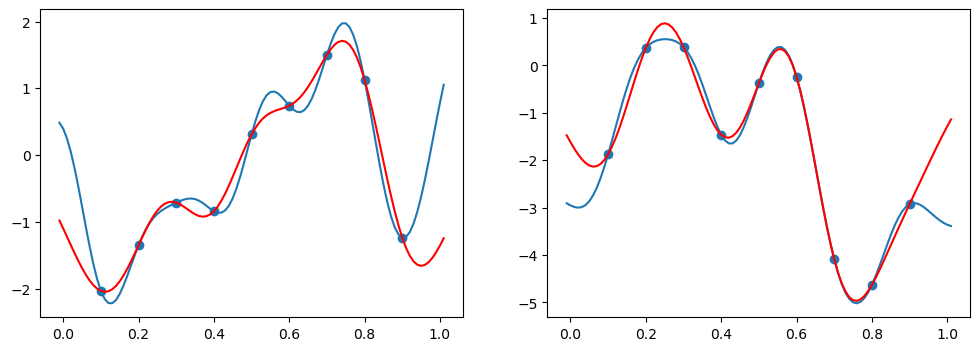

In [37]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

# Plot full gp
ax[0].plot(tau_grid_expanded, full_gp_sample[0:103])
ax[1].plot(tau_grid_expanded, full_gp_sample[103:])
ax[0].scatter(tau_grid_expanded[[11+i*10 for i in range(0,9)]],w_actual_knot[0:9])
ax[1].scatter(tau_grid_expanded[[11+i*10 for i in range(0,9)]],w_actual_knot[9:])

# Plot approx GP
ax[0].plot(tau_grid_expanded, w_approx_current[0:103], c='red')
ax[1].plot(tau_grid_expanded, w_approx_current[103:], c='red')

Plot Sub GP with knot approx

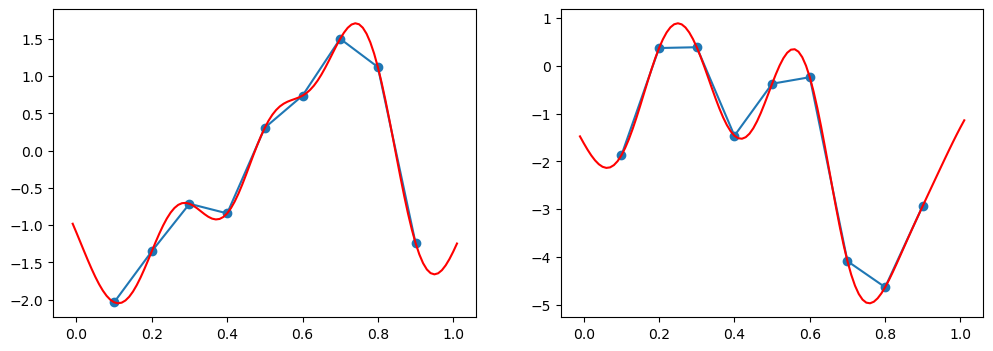

In [38]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

# Plot sub gp
ax[0].plot(tau_grid_expanded[[11+i*10 for i in range(0,9)]],w_actual_knot[0:9])
ax[1].plot(tau_grid_expanded[[11+i*10 for i in range(0,9)]],w_actual_knot[9:])
ax[0].scatter(tau_grid_expanded[[11+i*10 for i in range(0,9)]],w_actual_knot[0:9])
ax[1].scatter(tau_grid_expanded[[11+i*10 for i in range(0,9)]],w_actual_knot[9:])

# Plot approx GP
ax[0].plot(tau_grid_expanded, w_approx_current[0:103], c='red')
ax[1].plot(tau_grid_expanded, w_approx_current[103:], c='red')

Sample Sub GP and interpolate with knot approx

In [39]:
sub_covar = covariance_mat_single_var(knot_gp_input,
                                          kappa=kappa_current,
                                          rho=rho_current,
                                          lambd=lambd_current)

# Sample GP only at knot points
sub_gp_sample = np.random.multivariate_normal(np.zeros(len(sub_covar)),sub_covar)

# Get approximation
w_approx_current = calc_knot_approx_v2(full_gp_input,
                                knot_points_grid,
                                sub_covar,
                                sub_gp_sample,
                                kappa_current,
                                rho_current,
                                lambd_current)


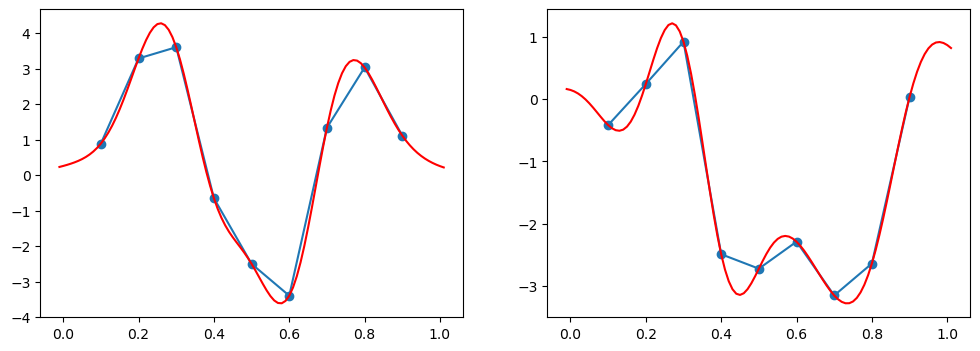

In [40]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

# Plot sub gp
ax[0].plot(tau_grid_expanded[[11+i*10 for i in range(0,9)]],sub_gp_sample[0:9])
ax[1].plot(tau_grid_expanded[[11+i*10 for i in range(0,9)]],sub_gp_sample[9:])
ax[0].scatter(tau_grid_expanded[[11+i*10 for i in range(0,9)]],sub_gp_sample[0:9])
ax[1].scatter(tau_grid_expanded[[11+i*10 for i in range(0,9)]],sub_gp_sample[9:])

# Plot approx GP
ax[0].plot(tau_grid_expanded, w_approx_current[0:103], c='red')
ax[1].plot(tau_grid_expanded, w_approx_current[103:], c='red')

Generate 100 GP samples

In [41]:
n_samps = 100

# Full GP Samples
full_gp_sample_many = np.random.multivariate_normal(np.zeros(len(full_gp_covar)),full_gp_covar, n_samps)

# Sub GP Samples
sub_covar = covariance_mat_single_var(knot_gp_input,
                                          kappa=kappa_current,
                                          rho=rho_current,
                                          lambd=lambd_current)

sub_gp_sample_many = np.random.multivariate_normal(np.zeros(len(sub_covar)),sub_covar, n_samps)


In [42]:
from scipy.stats import gamma

In [43]:
checker = gamma.rvs(3, scale=1/3, size=1000)
checker_2 = checker**(-0.5)

/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_91018/1742865614.py:73: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


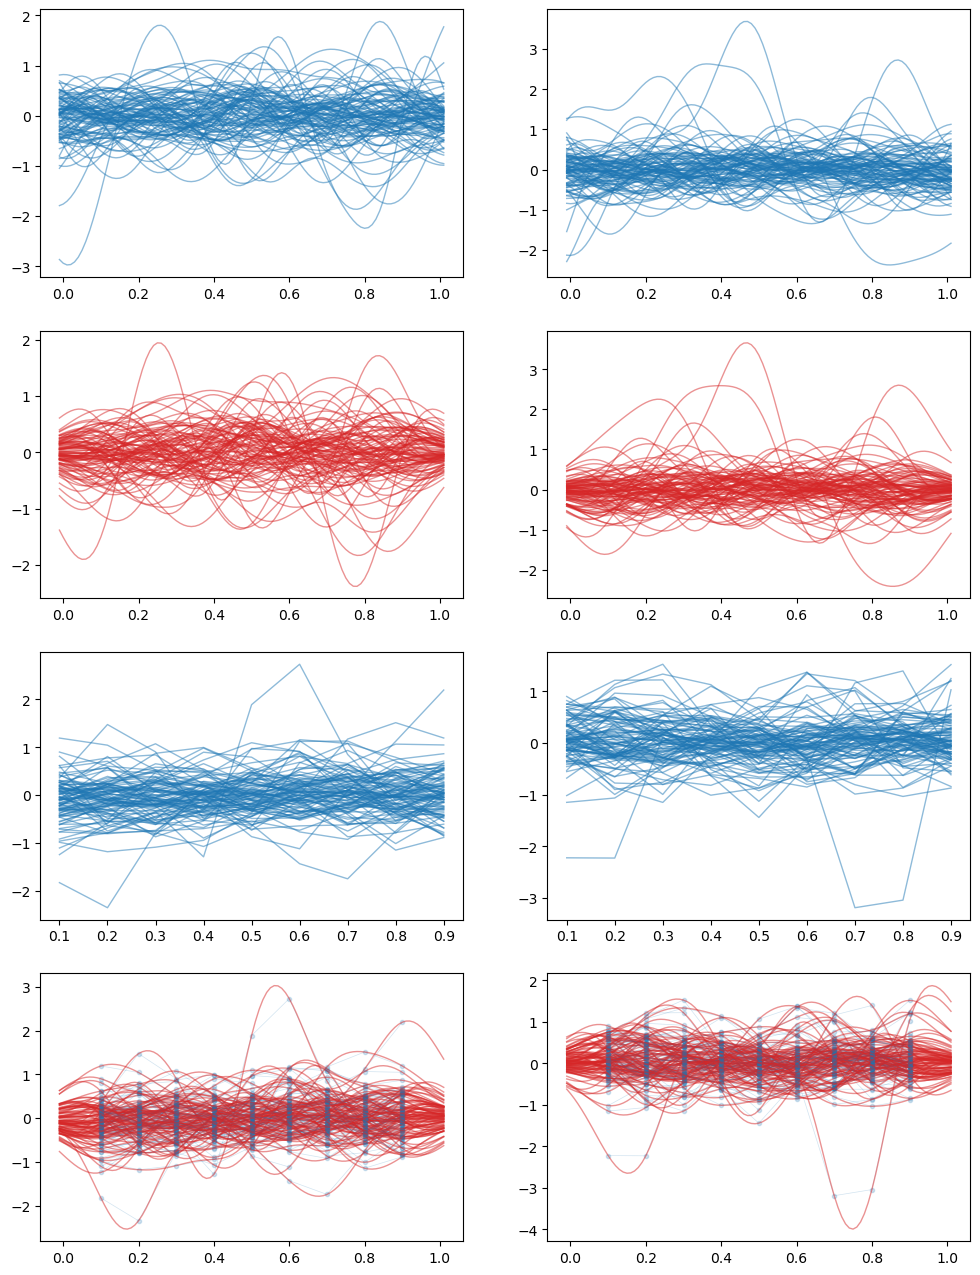

In [44]:
fig, ax = plt.subplots(4,2,figsize=(12,16))

n_samps = 100

for i in range(n_samps):
    
    # Sample parameters of interest
    kappa_current_inv_sq = gamma.rvs(3, scale=3)
    kappa_current = kappa_current_inv_sq**(-0.5)
    
    lambda_current_sq = gamma.rvs(5,scale=10) 
    lambda_current = np.sqrt(lambda_current_sq)
    rho_current = 0.1
    
    # Get full GP Sample
    full_gp_covar = covariance_mat_single_var(full_gp_input,
                                          kappa=kappa_current,
                                          rho=rho_current,
                                          lambd=lambd_current)
    
    full_gp_sample = np.random.multivariate_normal(np.zeros(len(full_gp_covar)),full_gp_covar)
    ax[0,0].plot(tau_grid_expanded, full_gp_sample[0:103].T, color='tab:blue', lw=1, alpha=0.5)
    ax[0,1].plot(tau_grid_expanded, full_gp_sample[103:].T, color='tab:blue', lw=1, alpha=0.5)
    
    
    # Get GP approx using subset points
    w_actual_knot = full_gp_sample[req_indexes]
    sub_covar = covariance_mat_single_var(knot_gp_input,
                                      kappa=kappa_current,
                                      rho=rho_current,
                                      lambd=lambd_current)
    w_approx_i_full_gp = calc_knot_approx_v2(full_gp_input,
                                knot_points_grid,
                                sub_covar,
                                w_actual_knot,
                                kappa_current,
                                rho_current,
                                lambd_current)
    ax[1,0].plot(tau_grid_expanded, w_approx_i_full_gp[0:103], c='tab:red', lw=1, alpha=0.5)
    ax[1,1].plot(tau_grid_expanded, w_approx_i_full_gp[103:], c='tab:red', lw=1, alpha=0.5)
    
    
    
    # Get GP Sampled only at knot points
    sub_covar = covariance_mat_single_var(knot_gp_input,
                                          kappa=kappa_current,
                                          rho=rho_current,
                                          lambd=lambd_current)
    sub_gp_sample = np.random.multivariate_normal(np.zeros(len(sub_covar)),sub_covar)
    
    ax[2,0].plot(knot_points_grid, sub_gp_sample[0:9].T, color='tab:blue', lw=1, alpha=0.5)
    ax[2,1].plot(knot_points_grid, sub_gp_sample[9:].T, color='tab:blue', lw=1, alpha=0.5)
    
    
    
    # Get GP approx Sample
    w_actual = sub_gp_sample
    
    w_approx_current_i = calc_knot_approx_v2(full_gp_input,
                                knot_points_grid,
                                sub_covar,
                                w_actual,
                                kappa_current,
                                rho_current,
                                lambd_current)
    
    ax[3,0].plot(knot_points_grid, sub_gp_sample[0:9].T, color='tab:blue', lw=0.5, alpha=0.2, marker='.')
    ax[3,1].plot(knot_points_grid, sub_gp_sample[9:].T, color='tab:blue', lw=0.5, alpha=0.2, marker='.')
    ax[3,0].plot(tau_grid_expanded, w_approx_current_i[0:103], c='tab:red', lw=1, alpha=0.5)
    ax[3,1].plot(tau_grid_expanded, w_approx_current_i[103:], c='tab:red', lw=1, alpha=0.5)


fig.show()

T GP Approx

In [45]:
from scipy.stats import multivariate_t

In [46]:
np.random.uniform(0,1)

0.7339640127613384

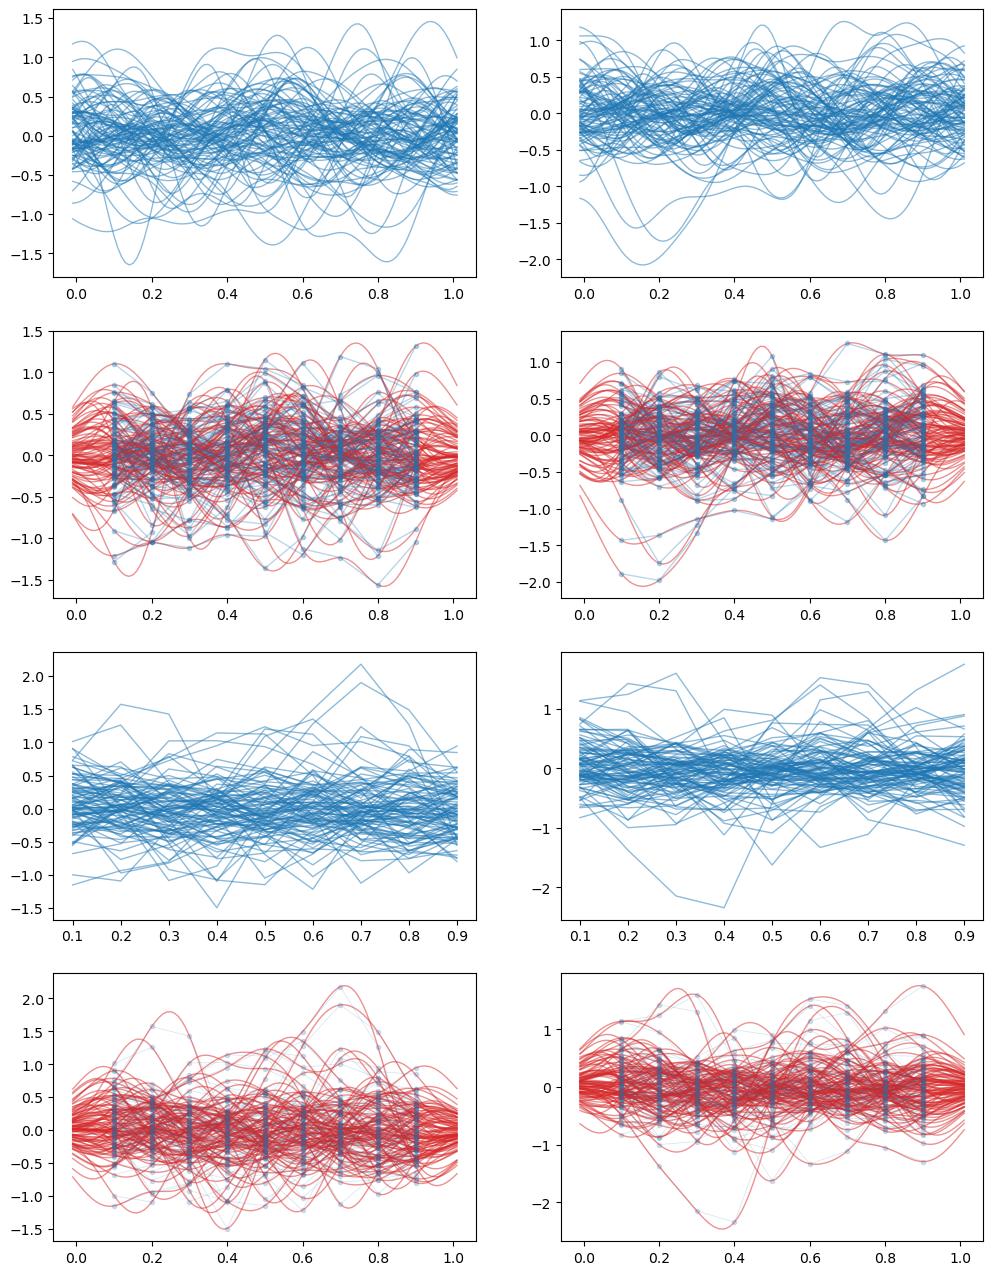

In [47]:
alpha_kappa = 3
beta_kappa = 1/3

fig, ax = plt.subplots(4,2,figsize=(12,16))

n_samps = 100

for i in range(n_samps):
    
    # Sample lambda
    lambda_current_sq = gamma.rvs(5,scale=10) 
    lambda_current = np.sqrt(lambda_current_sq)
    rho_current = np.random.uniform(0,1)
    #### Direction 1 ####
    
    # Full GP
    full_gp_covar = covariance_mat_single_var(full_gp_input,
                                              kappa=np.nan,
                                              rho=rho_current,
                                              lambd=lambd_current,
                                              with_kappa=False)


    w_t_samp_full = multivariate_t.rvs(loc=np.zeros(len(full_gp_covar)),
                              shape=full_gp_covar*(beta_kappa/alpha_kappa),
                              df=2*alpha_kappa)
    
    ax[0,0].plot(tau_grid_expanded, w_t_samp_full[0:103].T, color='tab:blue', lw=1, alpha=0.5)
    ax[0,1].plot(tau_grid_expanded, w_t_samp_full[103:].T, color='tab:blue', lw=1, alpha=0.5)
    
    
    
    # Get GP approx using subset points
    w_actual_knot = w_t_samp_full[req_indexes]
    
    sub_covar = covariance_mat_single_var(knot_gp_input,
                                      kappa=np.nan,
                                      rho=rho_current,
                                      lambd=lambd_current,
                                      with_kappa=False)
    
    w_approx_i_full_gp = calc_knot_approx_v2(full_gp_input,
                                knot_points_grid,
                                sub_covar,
                                w_actual_knot,
                                np.nan,
                                rho_current,
                                lambd_current,
                                with_kappa=False)
    
    ax[1,0].plot(tau_grid_expanded, w_approx_i_full_gp[0:103], c='tab:red', lw=1, alpha=0.5)
    ax[1,1].plot(tau_grid_expanded, w_approx_i_full_gp[103:], c='tab:red', lw=1, alpha=0.5)
    
    ax[1,0].plot(knot_points_grid, w_actual_knot[0:9], c='tab:blue', lw=1, alpha=0.3,marker='.')
    ax[1,1].plot(knot_points_grid, w_actual_knot[9:], c='tab:blue', lw=1, alpha=0.3,marker='.')
    
    
    #### Direction 2 ####
    
    # GP only at knot points
    knot_gp_covar = covariance_mat_single_var(knot_gp_input,
                                          kappa=np.nan,
                                          rho=rho_current,
                                          lambd=lambd_current,
                                          with_kappa=False)


    w_t_samp_knot = multivariate_t.rvs(loc=np.zeros(len(knot_gp_covar)),
                              shape=knot_gp_covar*(beta_kappa/alpha_kappa),
                              df=2*alpha_kappa)
    
    
    ax[2,0].plot(knot_points_grid, w_t_samp_knot[0:9].T, color='tab:blue', lw=1, alpha=0.5)
    ax[2,1].plot(knot_points_grid, w_t_samp_knot[9:].T, color='tab:blue', lw=1, alpha=0.5)
    
    # GP Approx (Expansion)
    w_actual = w_t_samp_knot
    
    sub_covar = covariance_mat_single_var(knot_gp_input,
                                  kappa=np.nan,
                                  rho=rho_current,
                                  lambd=lambd_current,
                                  with_kappa=False)
    
    w_approx_current_i = calc_knot_approx_v2(full_gp_input,
                                knot_points_grid,
                                sub_covar,
                                w_actual,
                                np.nan,
                                rho_current,
                                lambd_current,
                                with_kappa=False)
    
    
    ax[3,0].plot(knot_points_grid, w_t_samp_knot[0:9].T, color='tab:blue', lw=0.5, alpha=0.2, marker='.')
    ax[3,1].plot(knot_points_grid, w_t_samp_knot[9:].T, color='tab:blue', lw=0.5, alpha=0.2, marker='.')
    ax[3,0].plot(tau_grid_expanded, w_approx_current_i[0:103], c='tab:red', lw=1, alpha=0.5)
    ax[3,1].plot(tau_grid_expanded, w_approx_current_i[103:], c='tab:red', lw=1, alpha=0.5)

    
    

# GP Approx with mixture 
- Integrates out both kappa and lambda

Get Full GP

In [36]:
tau_grid_expanded = np.arange(-0.01,1.02,0.01)
tau_grid = np.arange(0.01,1.0,0.01)
knot_points_grid = np.arange(0.1,1,0.1)
m = len(tau_grid_expanded)

# Calc covariance matrix 
full_gp_sub_ids = np.array(m*[0] + m*[1]).reshape(-1,1)
full_gp_points_t = np.concatenate([tau_grid_expanded,
                            tau_grid_expanded]).reshape(-1,1)

full_gp_input = np.hstack([full_gp_sub_ids,
                           full_gp_points_t])

Sample Params

In [37]:
kappa_current_inv_sq = gamma.rvs(3, scale=3)
kappa_current = kappa_current_inv_sq**(-0.5)

lambda_current_sq = gamma.rvs(5,scale=10) 
lambda_current = np.sqrt(lambda_current_sq)
rho_current = 0.1

In [38]:
full_gp_covar = covariance_mat_single_var(full_gp_input,
                                          kappa=kappa_current,
                                          rho=rho_current,
                                          lambd=lambda_current)

full_gp_sample = np.random.multivariate_normal(np.zeros(len(full_gp_covar)),full_gp_covar)

In [39]:
# Get actual values
req_indexes = [11+i*10 for i in range(0,9)] + [103+11+i*10 for i in range(0,9)]
w_actual_knot = full_gp_sample[req_indexes]

# Get cov mat of knots
sub_covar = np.zeros([18,18])

for i1,i in enumerate(req_indexes):
    for j1,j in enumerate(req_indexes):
        sub_covar[i1,j1] = full_gp_covar[i,j]

In [41]:
m = len(knot_points_grid)

# Calc covariance matrix 
knot_sub_ids = np.array(m*[0] + m*[1]).reshape(-1,1)
knot_points_t = np.concatenate([knot_points_grid,
                            knot_points_grid]).reshape(-1,1)
knot_gp_input = np.hstack([knot_sub_ids, knot_points_t])

# Or alternative (18 x 18 covariance matrix at 18 knot points (9 per GP))
sub_covar2 = covariance_mat_single_var(knot_gp_input,
                                          kappa=kappa_current,
                                          rho=rho_current,
                                          lambd=lambda_current)

First compute lambda grid

In [42]:
h = 0.1
lamb_init = np.sqrt( np.log(0.99) / -(h**2) )

def d_kl(cov1, cov2):
    
    return 0.5*(calc_logdet(cov2) - calc_logdet(cov1) - cov1.shape[0] + np.trace(np.linalg.inv(cov2)@cov1))

def lamb_pdf(lambd,a_beta=6,b_beta=4):

    implied_rho = np.exp(-(h**2)*(lambd**2))

    pdf_term = beta.pdf(implied_rho, a_beta, b_beta) 

    jacobian_term = 1/np.abs(0.5*((np.log(implied_rho)/(-(h**2)))**(-0.5))*(1/(-(h**2)*implied_rho)))
    pdf_val = pdf_term*jacobian_term
    
    return pdf_val

def calc_logdet(mat):
    
    vals, vecs = np.linalg.eigh(mat)
    logdet  = np.log(vals).sum()
    return logdet

In [43]:
h = 0.1
lamb_init = np.sqrt( np.log(0.9) / -(h**2) )

lambd_collect = []
lambd_collect.append(lamb_init)
current_rho = np.exp(-(h**2)*lamb_init**2)
current_cov = covariance_mat_single_var(knot_gp_input,
                                        kappa=kappa_current,
                                        lambd=lamb_init,
                                        rho=rho_current,
                                        with_kappa=False)
lambd_prop = lamb_init + 0.01
prop_cov = covariance_mat_single_var(knot_gp_input,
                                        kappa=kappa_current,
                                        lambd=lambd_prop,
                                        rho=rho_current,
                                     with_kappa=False)
                                        
while current_rho > 0.1:
    
    counter = 0
    while d_kl(current_cov, prop_cov) < 0.25:
        lambd_prop += 0.005
        prop_cov = covariance_mat_single_var(knot_gp_input,
                                        kappa=kappa_current,
                                        lambd=lambd_prop,
                                             rho=rho_current,
                                             with_kappa=False)
        
        prop_rho = np.exp(-(h**2)*lambd_prop**2)
        
        if prop_rho < 0.05:
            break
        
        counter += 1
        if counter > 5000:
            break
            
    current_cov = prop_cov
    current_lamb = lambd_prop
    current_rho = np.exp(-(h**2)*current_lamb**2)
    
    lambd_collect.append(current_lamb)
    
    lambd_prop = current_lamb+0.01

In [44]:
from scipy.stats import beta
import seaborn as sns

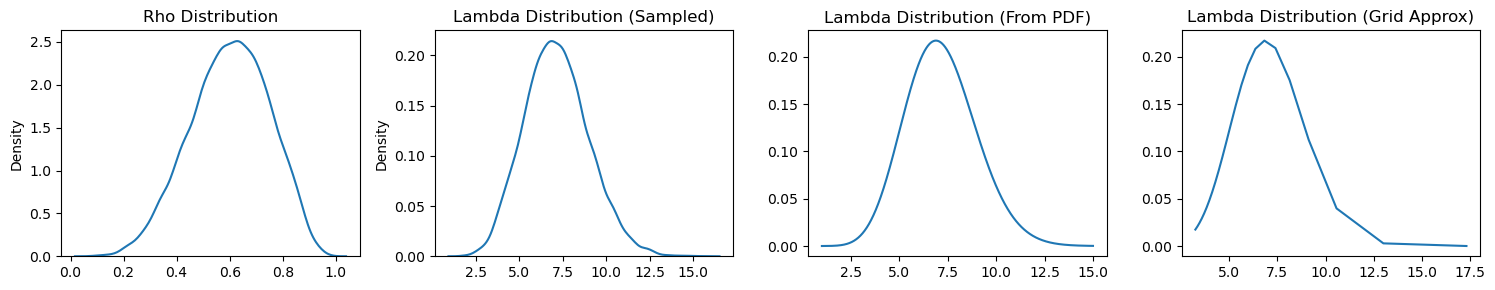

In [45]:
fig, ax = plt.subplots(1,4,figsize=(15,3))
rho_dist = beta.rvs(6,4,size=10000)
lambd_dist = np.sqrt(np.log(rho_dist)/(-(h**2)))

lambd_grid_pdf = np.arange(1,15,0.01)
true_pdf_vals = lamb_pdf(lambd_grid_pdf)

# Grid approx values
lambd_grid = np.array(lambd_collect)
grid_pdf_vals = lamb_pdf(lambd_grid)

sns.kdeplot(rho_dist, ax=ax[0])
sns.kdeplot(lambd_dist, ax=ax[1])
ax[2].plot(lambd_grid_pdf,true_pdf_vals)
ax[3].plot(lambd_grid,grid_pdf_vals)

ax[0].set_title('Rho Distribution')
ax[1].set_title('Lambda Distribution (Sampled)')
ax[2].set_title('Lambda Distribution (From PDF)')
ax[3].set_title('Lambda Distribution (Grid Approx)')

plt.tight_layout()

In [46]:
lambda_grid_log_prob = np.log(grid_pdf_vals)
b_kappa = 3
a_kappa = 3

In [54]:
cov_mat_knot_store = []
A_g_matrices = []
lambda_grid = lambd_grid
G = len(lambda_grid)

# Pre compute stuff
for g in range(G):
    lambda_g = lambda_grid[g]

    # Compute c** (m x m)
    cov_mat_knots_g = covariance_mat_single_var(knot_gp_input,
                                                kappa=0,
                                                lambd=lambda_g,
                                                rho=rho_current,
                                                with_kappa=False)
    
    cov_mat_knot_store.append(cov_mat_knots_g)

    
    # compute C_0* (L x m)
    C_0 = np.zeros([len(full_gp_input), len(knot_gp_input)])
    for l in range(len(full_gp_input)):
        for m in range(len(knot_gp_input)):

            tau_l = full_gp_input[l]
            tau_m = knot_gp_input[m]

            C_0[l,m] = covariance_function_single_var(tau_l,
                                                tau_m,
                                                kappa=0,
                                                lambd = lambda_g,
                                                      rho=rho_current,
                                                      with_kappa=False)


    cov_mat_knots_inv = np.linalg.inv(cov_mat_knots_g)
    A_g = C_0 @ cov_mat_knots_inv
    A_g_matrices.append(A_g)

    
# Calc mixture
G = len(A_g_matrices)
M = len(w_actual_knot)

norm_pdf_lambda = renorm_dist(lambda_grid_log_prob)

# Have to do for all calculations
t_log_pdfs = np.zeros(G)
for g in range(G):
    t_log_pdf = logpdf_t(w_actual_knot,
                        np.zeros(M),
                        (b_kappa/a_kappa)*cov_mat_knot_store[g],
                        2*a_kappa)

    t_log_pdfs[g] = t_log_pdf

output_vec = np.zeros(len(tau_grid))
matrix_term = np.zeros([A_g_matrices[0].shape[0], A_g_matrices[0].shape[1]])
marginal_log_prob = 0
marginal_log_prob_store = []
for g in range(G):

    marginal_log_prob += np.log(norm_pdf_lambda[g]) + t_log_pdfs[g]
    marginal_log_prob_store.append(marginal_log_prob)
    
mixture_weights = renorm_dist(np.array(marginal_log_prob_store))
for g in range(G):
    
    matrix_term += mixture_weights[g] * (A_g_matrices[g])

    
approx_vec = matrix_term @ w_actual_knot 

In [70]:
from scipy.stats import multivariate_t

In [74]:
multivariate_t.logpdf(w_actual_knot,
                        np.zeros(M),
                        (b_kappa/a_kappa)*cov_mat_knot_store[g],
                        2*a_kappa)

-11.541403597275362

In [75]:
%%timeit

for g in range(G):
    t_log_pdf = multivariate_t.logpdf(w_actual_knot,
                        np.zeros(M),
                        (b_kappa/a_kappa)*cov_mat_knot_store[g],
                        2*a_kappa)

    t_log_pdfs[g] = t_log_pdf

8.41 ms ± 927 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


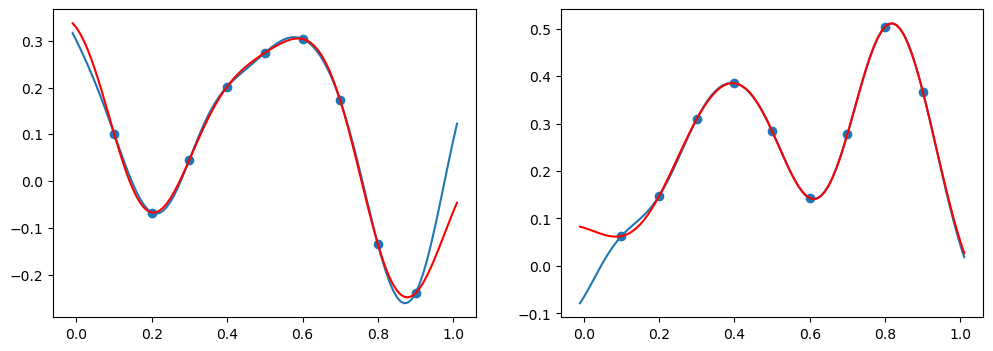

In [56]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

# Plot full gp
ax[0].plot(tau_grid_expanded, full_gp_sample[0:103])
ax[1].plot(tau_grid_expanded, full_gp_sample[103:])
ax[0].scatter(tau_grid_expanded[[11+i*10 for i in range(0,9)]],w_actual_knot[0:9])
ax[1].scatter(tau_grid_expanded[[11+i*10 for i in range(0,9)]],w_actual_knot[9:])

# Plot approx GP
ax[0].plot(tau_grid_expanded, approx_vec[0:103], c='red')
ax[1].plot(tau_grid_expanded, approx_vec[103:], c='red')

In [65]:
from scipy.stats import t

In [62]:
100*7.55

755.0

In [63]:
w_actual_knot

array([ 0.10124535, -0.06737301,  0.04598307,  0.20205458,  0.27419364,
        0.30400735,  0.1725713 , -0.13489917, -0.2398534 ,  0.06267264,
        0.14712529,  0.30977867,  0.38520165,  0.28422063,  0.14280368,
        0.27804443,  0.50444701,  0.36748188])

In [66]:
t.ppf(0.5, 6, 0,1)

6.919082007155017e-17

In [66]:
from  scipy.special import gammaln

def logpdf_t(x, mean, shape, df):
    # https://gregorygundersen.com/blog/2020/01/20/multivariate-t/
    dim = mean.size

    vals, vecs = np.linalg.eigh(shape)
    logdet     = np.log(vals).sum()
    valsinv    = np.array([1./v for v in vals])
    U          = vecs * np.sqrt(valsinv)
    dev        = x - mean
    maha       = np.square(np.dot(dev, U)).sum(axis=-1)

    t = 0.5 * (df + dim)
    A = gammaln(t)
    B = gammaln(0.5 * df)
    C = dim/2. * np.log(df * np.pi)
    D = 0.5 * logdet
    E = -t * np.log(1 + (1./df) * maha)

    return A - B - C - D + E

def logsumexp(x):
    # Utility to do renormalization properly
    # https://gregorygundersen.com/blog/2020/02/09/log-sum-exp/
    c = x.max()
    return c + np.log(np.sum(np.exp(x - c)))

def renorm_dist(log_p_vec):
    return np.exp(log_p_vec - logsumexp(log_p_vec))

def calc_mixture_knot_approx_marginalized(w_j_star: np.ndarray,
                                 a_kappa: float,
                                 b_kappa: float,
                                 tau_grid: np.ndarray,
                                 A_g_matrices: List[np.ndarray],
                                 cov_mat_knot_store: List[np.ndarray],
                                 lambda_grid_log_prob: List[float]):
    
    G = len(A_g_matrices)
    M = len(w_j_star)

    norm_pdf_lambda = renorm_dist(lambda_grid_log_prob)

    t_log_pdfs = np.zeros(G)
    for g in range(G):
        t_log_pdf = logpdf_t(w_j_star,
                            np.zeros(M),
                            (b_kappa/a_kappa)*cov_mat_knot_store[g],
                            2*a_kappa)

        t_log_pdfs[g] = t_log_pdf
        
    output_vec = np.zeros(len(tau_grid))
    matrix_term = np.zeros([A_g_matrices[0].shape[0], A_g_matrices[0].shape[1]])
    marginal_log_prob = 0
    for g in range(G):
        
        marginal_log_prob += np.log(norm_pdf_lambda[g]) + t_log_pdfs[g]
    
    for g in range(G):
        matrix_term += norm_pdf_lambda[g] * np.exp(t_log_pdfs[g]) * (A_g_matrices[g])

    
    output_vec = matrix_term @ w_j_star 
    return output_vec, marginal_log_prob

In [49]:
from typing import List

def precompute_approx(tau_grid: np.ndarray,
                      knot_points_grid: np.ndarray,
                      rho: float,
                      lambda_grid: np.ndarray):
    

    # Pre-compute things
    cov_mat_knot_store = []
    A_g_matrices = []
    G = len(lambda_grid)

    # Pre compute stuff
    for g in range(G):
        lambda_g = lambda_grid[g]
        
        # Compute c** (m x m)
        cov_mat_knots_g = covariance_mat_single_var(knot_gp_input,
                                                    kappa=0,
                                                    lambd=lambda_g,
                                                    rho=rho_current,
                                                    with_kappa=False)
        
        cov_mat_knot_store.append(cov_mat_knots_g)
        
        # compute C_0* (L x m)
        C_0 = np.zeros([len(tau_grid), len(knot_points_grid)])
        for l in range(len(tau_grid)):
            for m in range(len(knot_points_grid)):
                tau_l = tau_grid[l]
                tau_m = knot_points_grid[m]
                C_0[l,m] = covariance_function_single_var(tau_l,
                                                    tau_m,
                                                    kappa=0, lambd = lambda_g, with_kappa=False)

        cov_mat_knots_inv = np.linalg.inv(cov_mat_knots_g)
        A_g = C_0 @ cov_mat_knots_inv
        A_g_matrices.append(A_g)

    return cov_mat_knot_store, A_g_matrices 

def calc_mixture_knot_approx_marginalized(w_j_star: np.ndarray,
                                 a_kappa: float,
                                 b_kappa: float,
                                 tau_grid: np.ndarray,
                                 A_g_matrices: List[np.ndarray],
                                 cov_mat_knot_store: List[np.ndarray],
                                 lambda_grid_log_prob: List[float]):
    
    G = len(A_g_matrices)
    M = len(w_j_star)

    norm_pdf_lambda = renorm_dist(lambda_grid_log_prob)

    t_log_pdfs = np.zeros(G)
    for g in range(G):
        t_log_pdf = logpdf_t(w_j_star,
                            np.zeros(M),
                            (b_kappa/a_kappa)*cov_mat_knot_store[g],
                            2*a_kappa)

        t_log_pdfs[g] = t_log_pdf
        
    output_vec = np.zeros(len(tau_grid))
    matrix_term = np.zeros([A_g_matrices[0].shape[0], A_g_matrices[0].shape[1]])
    marginal_log_prob = 0
    for g in range(G):
        
        matrix_term += norm_pdf_lambda[g] * np.exp(t_log_pdfs[g]) * (A_g_matrices[g])

        marginal_log_prob += np.log(norm_pdf_lambda[g]) + t_log_pdfs[g]

    output_vec = matrix_term @ w_j_star 
    return output_vec, marginal_log_prob

GP Approx with multivariate t

In [33]:
data_size = 1000
tau_upper_tail = 1-1/(2*data_size)
tau_lower_tail = 1/(2*data_size)
t_vec = 1

def geometric_seq(start, end, ratio, upper=True):
    # Generates geometric sequence
    output_vals = []
    current_val = start
    i = 0
    
    if upper:
        while current_val < end: 
            current_val += ratio/(2**i)
            i += 1
            output_vals.append(current_val)
    
    else:
        while current_val > end:
            current_val -= ratio/(2**i)
            i += 1
            output_vals.append(current_val)
        
        
    return np.array(output_vals)


In [34]:
geometric_seq(0.01, tau_lower_tail, 0.005, upper=False)

array([0.005    , 0.0025   , 0.00125  , 0.000625 , 0.0003125])

In [404]:
0.99+0.05
np.log(1e99)

227.95592420641051

In [386]:
np.arange(0.99, tau_upper_tail, 0.0005)

array([0.99  , 0.9905, 0.991 , 0.9915, 0.992 , 0.9925, 0.993 , 0.9935,
       0.994 , 0.9945, 0.995 , 0.9955, 0.996 , 0.9965, 0.997 , 0.9975,
       0.998 , 0.9985, 0.999 , 0.9995])

In [383]:
tau_lower_tail

0.0005

In [67]:
from numba_stats import t as numba_t

In [74]:
numba_t.ppf(np.array([0.4,0.75]),5,0.0,3.0)

array([-0.8015426 ,  2.18006053])

In [72]:
t.ppf(0.75,5,0.0,0.3)

0.21800605313938187